# Загрузка данных с kaggle

https://drive.google.com/file/d/1l-LM6eWXShRZ_EAQlHBze3e2Gpvvw3_u/view?usp=sharing

In [ ]:
!gdown 1sTz6v2hOR2f67lFzRVD9CjLSCz-jXyPJ

Downloading...
From: https://drive.google.com/uc?id=1sTz6v2hOR2f67lFzRVD9CjLSCz-jXyPJ
To: /content/train.csv.zip
100% 664k/664k [00:00<00:00, 132MB/s]


In [ ]:
!unzip -o /content/train.csv.zip -d /content/train.csv

Archive:  /content/train.csv.zip
  inflating: /content/train.csv/train.csv  


In [ ]:
!gdown 1l-LM6eWXShRZ_EAQlHBze3e2Gpvvw3_u

Downloading...
From: https://drive.google.com/uc?id=1l-LM6eWXShRZ_EAQlHBze3e2Gpvvw3_u
To: /content/test.csv.zip
100% 313k/313k [00:00<00:00, 100MB/s]


In [ ]:
!unzip -o /content/test.csv.zip -d /content/test.csv

Archive:  /content/test.csv.zip
  inflating: /content/test.csv/test.csv  


# Exploring data analysis (EDA)





Импортируем необходимые библиотеки

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('dark_background')

Загружаем данные и обрабатываем их

In [ ]:
df = pd.read_csv('/content/train.csv/train.csv')

In [ ]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount', 'id'],
      dtype='object')

In [ ]:
df.select_dtypes(include='object').head() # смотрим на категориальные признаки

,Suburb,Address,Type,Method,SellerG,Date,CouncilArea,Regionname
0,Abbotsford,85 Turner St,h,S,Biggin,3/12/2016,Yarra City Council,Northern Metropolitan
1,Abbotsford,25 Bloomburg St,h,S,Biggin,4/02/2016,Yarra City Council,Northern Metropolitan
2,Abbotsford,5 Charles St,h,SP,Biggin,4/03/2017,Yarra City Council,Northern Metropolitan
3,Abbotsford,40 Federation La,h,PI,Biggin,4/03/2017,Yarra City Council,Northern Metropolitan
4,Abbotsford,55a Park St,h,VB,Nelson,4/06/2016,Yarra City Council,Northern Metropolitan


In [ ]:
df.isna().mean() # ищем пропуски

,0
Suburb,0.000000
Address,0.000000
Rooms,0.000000
Type,0.000000
Price,0.000000
Method,0.000000
SellerG,0.000000
Date,0.000000
Distance,0.000000
Postcode,0.000000


In [ ]:
df[df['CouncilArea'].isnull()|df['Regionname'].isnull()|df['Propertycount'].isnull()][['Suburb', 'Address', 'Postcode', 'CouncilArea', 'Regionname', 'Propertycount']] # в категориальных пропусках ищем закономерности

,Suburb,Address,Postcode,CouncilArea,Regionname,Propertycount
14406,Footscray,2/16 Stafford St,3011.0,NaN,NaN,NaN


In [ ]:
df[(df['Suburb']=='Footscray') & (df['Postcode']== 3011.0)][['Suburb', 'Address', 'Postcode', 'CouncilArea', 'Regionname', 'Propertycount']]

,Suburb,Address,Postcode,CouncilArea,Regionname,Propertycount
3368,Footscray,4/33 Ballarat Rd,3011.0,Maribyrnong City Council,Western Metropolitan,7570.0
3369,Footscray,4 Adelaide St,3011.0,Maribyrnong City Council,Western Metropolitan,7570.0
3370,Footscray,11/44 Everard St,3011.0,Maribyrnong City Council,Western Metropolitan,7570.0
3371,Footscray,9 Lynch St,3011.0,Maribyrnong City Council,Western Metropolitan,7570.0
3372,Footscray,25 Southampton St,3011.0,Maribyrnong City Council,Western Metropolitan,7570.0
...,...,...,...,...,...,...
17458,Footscray,1/53 Eleanor St,3011.0,Maribyrnong City Council,Western Metropolitan,7570.0
18017,Footscray,6/63 Hyde St,3011.0,Maribyrnong City Council,Western Metropolitan,7570.0
18018,Footscray,39 Moore St,3011.0,Maribyrnong City Council,Western Metropolitan,7570.0
18019,Footscray,141 Summerhill Rd,3011.0,Maribyrnong City Council,Western Metropolitan,7570.0


In [ ]:
df['CouncilArea'].fillna('Maribyrnong City Council', inplace = True) # заполняем категориальные пропуски
df['Regionname'].fillna('Western Metropolitan', inplace = True)
df['Propertycount'].fillna('7570.0', inplace = True)

/tmp/ipython-input-3055761792.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['CouncilArea'].fillna('Maribyrnong City Council', inplace = True) # заполняем категориальные пропуски
/tmp/ipython-input-3055761792.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, 

In [ ]:
df.isna().mean()

,0
Suburb,0.000000
Address,0.000000
Rooms,0.000000
Type,0.000000
Price,0.000000
Method,0.000000
SellerG,0.000000
Date,0.000000
Distance,0.000000
Postcode,0.000000


In [ ]:
num_cols = ['Bedroom2', 'Bathroom', 'Car', 'Landsize','BuildingArea','YearBuilt', 'Lattitude', 'Longtitude']

In [ ]:
df[num_cols]=df[num_cols].fillna(df[num_cols].median()) # теперь заполняем числовые пропуски медианным значением

In [ ]:
df.isna().mean()

,0
Suburb,0.0
Address,0.0
Rooms,0.0
Type,0.0
Price,0.0
Method,0.0
SellerG,0.0
Date,0.0
Distance,0.0
Postcode,0.0


<Axes: >

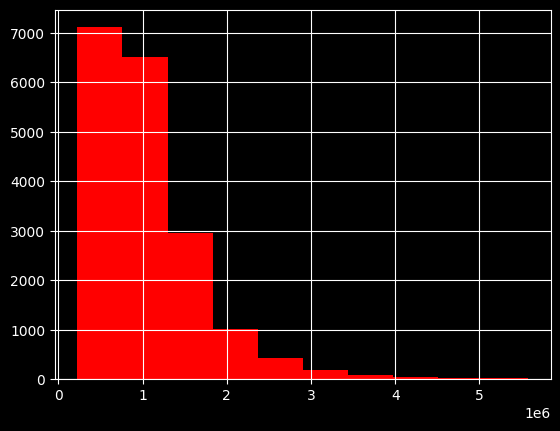

In [ ]:
df['Price'].hist(color = 'red') # смотрим на распределение целевой функции

In [ ]:
df['Target']=np.log1p(df['Price']) # Распределение не нормальное, поэтому логарифмируем целевой признак

<Axes: >

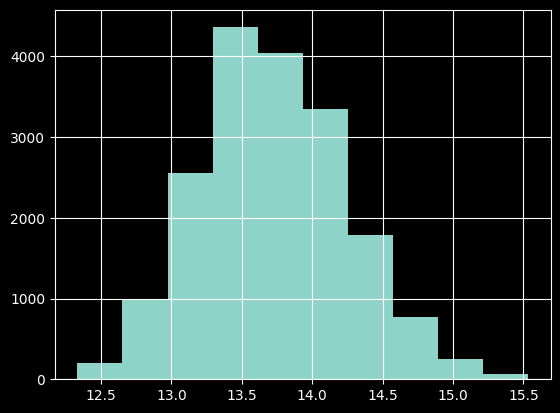

In [ ]:
df['Target'].hist() # теперь у нас нормальное распределение

Ищем выбросы в числовых переменных


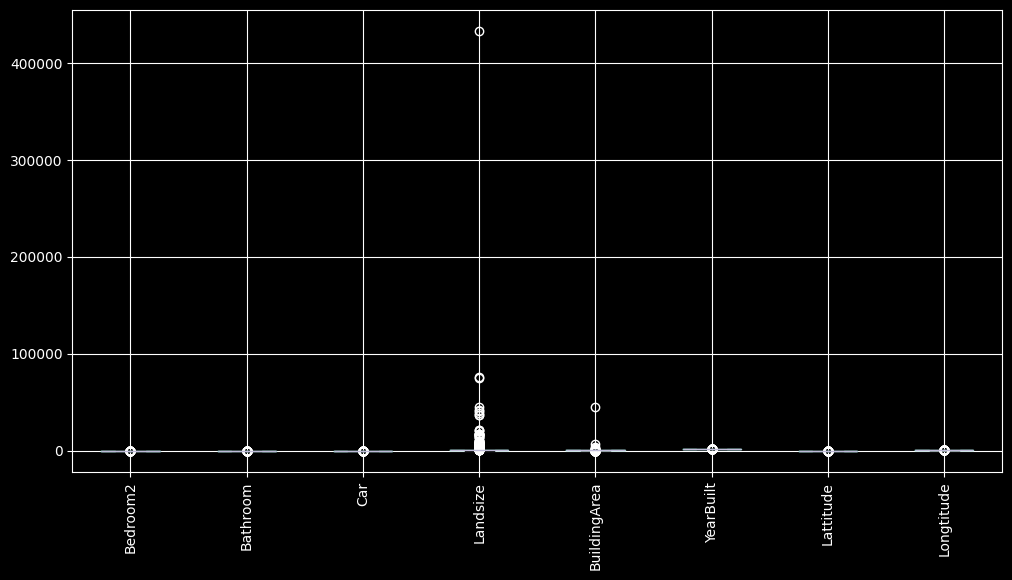

In [ ]:
plt.figure(figsize=(12, 6))
df[num_cols].boxplot(rot=90)  # поворачиваем подписи для читаемости
plt.show()

In [ ]:
df = df[df['Landsize'] != 433014.0] # исключаем самый большой выброс

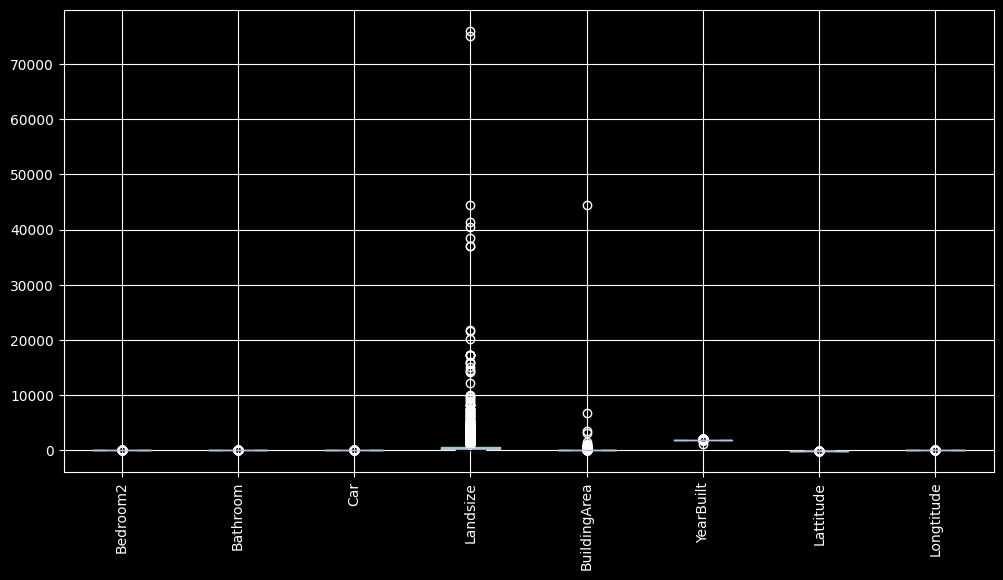

In [ ]:
plt.figure(figsize=(12, 6))
df[num_cols].boxplot(rot=90)  # поворачиваем подписи для читаемости
plt.show()

In [ ]:
df['Landsize'] = np.log1p(df['Landsize']) # Переменная Landsize имеет много выбросов, поэтому тоже ее логарифмируем, чтобы нормализовать значения

<Axes: >

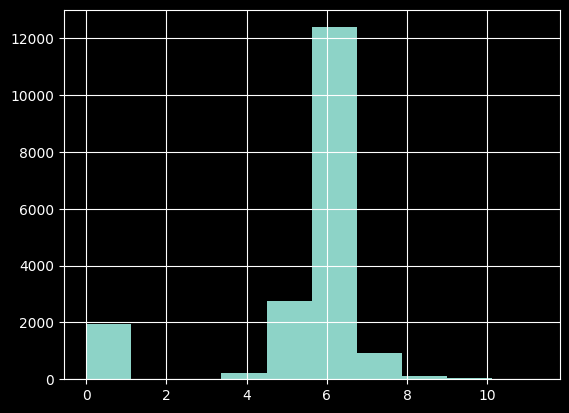

In [ ]:
df['Landsize'].hist()

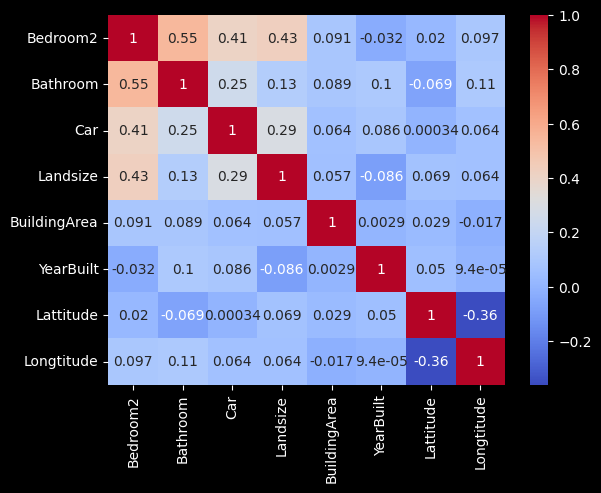

In [ ]:
corr_matrix = df[num_cols].corr() # ищем сильные корреляции, чтобы убрать лишние признаки
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


In [ ]:
df['Bed/Bath'] = df['Bedroom2']/df['Bathroom']

In [ ]:
#Из-за сильной корреляции убираем две переменные и делаем из них одну, являющуюся их отношением

In [ ]:
num_cols2 = ['Bed/Bath', 'Car', 'Landsize','BuildingArea','YearBuilt', 'Lattitude', 'Longtitude']

# Обучение модели

In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.4 MB/s eta 0:00:00


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from catboost import CatBoostRegressor
from tqdm import tqdm

In [ ]:
train, test = train_test_split(df,train_size=0.6,random_state=42) # делим выборку на тренировочную и тестовую

In [ ]:
len(train)/len(df)

0.599989113868931

In [ ]:
len(test)/len(df)

0.400010886131069

In [ ]:
train, val = train_test_split(train,train_size=0.8,random_state=42) # добавляем выборку для валидации

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18372 entries, 0 to 18372
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         18372 non-null  object 
 1   Address        18372 non-null  object 
 2   Rooms          18372 non-null  int64  
 3   Type           18372 non-null  object 
 4   Price          18372 non-null  float64
 5   Method         18372 non-null  object 
 6   SellerG        18372 non-null  object 
 7   Date           18372 non-null  object 
 8   Distance       18372 non-null  float64
 9   Postcode       18372 non-null  float64
 10  Bedroom2       18372 non-null  float64
 11  Bathroom       18372 non-null  float64
 12  Car            18372 non-null  float64
 13  Landsize       18372 non-null  float64
 14  BuildingArea   18372 non-null  float64
 15  YearBuilt      18372 non-null  float64
 16  CouncilArea    18372 non-null  object 
 17  Lattitude      18372 non-null  float64
 18  Longtitude 

In [ ]:
# добавляем признаки в catboost для обучения
X = ['Rooms', 'Date', 'Distance', 'Postcode', 'Bed/Bath', 'Car', 'Landsize','BuildingArea','YearBuilt', 'CouncilArea', 'Lattitude', 'Longtitude', 'Propertycount', 'Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Regionname']
cat_features = ['Suburb', 'Address', 'Date', 'Type', 'Method', 'SellerG', 'CouncilArea', 'Regionname']
Y = ['Target']

In [ ]:
# задаем параметры модели
model = CatBoostRegressor(cat_features=cat_features,
                          eval_metric='MAPE',
                          random_seed=42,
                          verbose=100)

In [ ]:
# обучаем модель
model.fit(train[X],train[Y], eval_set=(val[X],val[Y]))

Learning rate set to 0.071667
0:	learn: 0.0289977	test: 0.0294370	best: 0.0294370 (0)	total: 79.3ms	remaining: 1m 19s
100:	learn: 0.0116922	test: 0.0122252	best: 0.0122252 (100)	total: 2.32s	remaining: 20.6s
200:	learn: 0.0106551	test: 0.0114622	best: 0.0114622 (200)	total: 4.53s	remaining: 18s
300:	learn: 0.0100694	test: 0.0111378	best: 0.0111378 (300)	total: 6.73s	remaining: 15.6s
400:	learn: 0.0096785	test: 0.0109439	best: 0.0109437 (399)	total: 8.99s	remaining: 13.4s
500:	learn: 0.0093289	test: 0.0108069	best: 0.0108066 (499)	total: 12.6s	remaining: 12.6s
600:	learn: 0.0090506	test: 0.0107174	best: 0.0107174 (600)	total: 14.8s	remaining: 9.85s
700:	learn: 0.0087910	test: 0.0106391	best: 0.0106391 (700)	total: 17.1s	remaining: 7.31s
800:	learn: 0.0085462	test: 0.0105677	best: 0.0105677 (800)	total: 19.4s	remaining: 4.81s
900:	learn: 0.0083368	test: 0.0104942	best: 0.0104942 (900)	total: 21.7s	remaining: 2.38s
999:	learn: 0.0081365	test: 0.0104726	best: 0.0104711 (981)	total: 25.4s	r

In [ ]:
# смотрим результат на тестовой выборке
model.predict(test[X])

array([13.55344018, 12.78187357, 14.44486998, ..., 13.24491729,
       13.13701466, 13.21717099])

In [ ]:
test['Target_pred'] = model.predict(test[X]) # добавляем полученные данные

In [ ]:
test

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,id,Target,Bed/Bath,Target_pred
14656,Avondale Heights,26 Clarendon St,4,h,665000.0,PI,Nelson,22/07/2017,9.5,3034.0,...,1970.0,Moonee Valley City Council,-37.76518,144.85621,Western Metropolitan,4502.0,2954,13.407544,4.000000,13.553440
17372,Carnegie,12/40 Woorayl St,1,u,381000.0,S,Ray,23/09/2017,10.1,3163.0,...,1970.0,Glen Eira City Council,-37.88642,145.05979,Southern Metropolitan,7822.0,24519,12.850557,1.000000,12.781874
2874,Eaglemont,20 Glenard Dr,4,h,2309000.0,S,Nelson,28/08/2016,10.3,3084.0,...,1960.0,Banyule City Council,-37.76520,145.06870,Eastern Metropolitan,1651.0,6870,14.652326,1.333333,14.444870
14845,Mulgrave,2 Kinkora Ct,3,h,755000.0,S,Ray,22/07/2017,18.8,3170.0,...,2005.0,Monash City Council,-37.92285,145.18549,South-Eastern Metropolitan,7113.0,8021,13.534474,1.500000,13.475514
8866,Hawthorn East,218/12 Albert St,1,u,375000.0,PI,hockingstuart,22/05/2016,7.5,3123.0,...,1970.0,Boroondara City Council,-37.80360,145.00110,Southern Metropolitan,6482.0,9080,12.834684,3.000000,12.939068
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12760,Pakenham,69 Willowtree Dr,4,h,410500.0,S,C21,24/06/2017,47.3,3810.0,...,1970.0,Cardinia Shire Council,-38.07474,145.45376,Eastern Victoria,17384.0,4234,12.925134,2.000000,13.239851
14218,South Yarra,18/27 Avoca St,2,u,621000.0,S,Jellis,12/08/2017,2.7,3141.0,...,1970.0,Melbourne City Council,-37.80360,145.00110,Southern Metropolitan,14887.0,11232,13.339088,3.000000,13.539687
3954,Hampton East,9/12 Bartlett St,2,u,400000.0,S,Greg,4/03/2017,14.5,3188.0,...,1960.0,Bayside City Council,-37.93670,145.03220,Southern Metropolitan,2356.0,26650,12.899222,2.000000,13.244917
4403,Keilor East,1/36 Phillip Rd,2,h,380000.0,S,Nelson,14/05/2016,12.8,3033.0,...,1970.0,Brimbank City Council,-37.74800,144.86960,Western Metropolitan,5629.0,19628,12.847929,2.000000,13.137015


In [ ]:
mean_absolute_error(test['Target'], test['Target_pred']) # смотрим ошибки

0.14273123344131758

In [ ]:
mean_absolute_percentage_error(test['Target'], test['Target_pred'])

0.010364785957918465

In [ ]:
errors_log = test['Target_pred'] - test['Target']

In [ ]:
variance_errors_log = np.var(errors_log, ddof=0)  # выборочная дисперсия
print("Дисперсия ошибок:", variance_errors_log)

Дисперсия ошибок: 0.036573566359233145


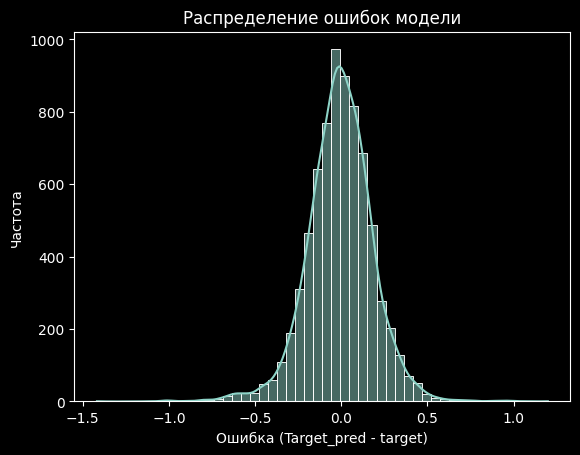

In [ ]:
sns.histplot(errors_log , bins=50, kde=True) # смотрим распределение ощибок
plt.xlabel("Ошибка (Target_pred - target)")
plt.ylabel("Частота")
plt.title("Распределение ошибок модели")
plt.show()

In [ ]:
# видим нормальное распределение ошибок логарифмированного признака, значит модель работает хорошо

In [ ]:
test['Price_pred'] = np.expm1(test['Target_pred']) # переводим значение из логарифмировонного в абсолютное

In [ ]:
test.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,id,Target,Bed/Bath,Target_pred,Price_pred
14656,Avondale Heights,26 Clarendon St,4,h,665000.0,PI,Nelson,22/07/2017,9.5,3034.0,...,Moonee Valley City Council,-37.76518,144.85621,Western Metropolitan,4502.0,2954,13.407544,4.000000,13.553440,7.694559e+05
17372,Carnegie,12/40 Woorayl St,1,u,381000.0,S,Ray,23/09/2017,10.1,3163.0,...,Glen Eira City Council,-37.88642,145.05979,Southern Metropolitan,7822.0,24519,12.850557,1.000000,12.781874,3.557099e+05
2874,Eaglemont,20 Glenard Dr,4,h,2309000.0,S,Nelson,28/08/2016,10.3,3084.0,...,Banyule City Council,-37.76520,145.06870,Eastern Metropolitan,1651.0,6870,14.652326,1.333333,14.444870,1.876407e+06
14845,Mulgrave,2 Kinkora Ct,3,h,755000.0,S,Ray,22/07/2017,18.8,3170.0,...,Monash City Council,-37.92285,145.18549,South-Eastern Metropolitan,7113.0,8021,13.534474,1.500000,13.475514,7.117716e+05
8866,Hawthorn East,218/12 Albert St,1,u,375000.0,PI,hockingstuart,22/05/2016,7.5,3123.0,...,Boroondara City Council,-37.80360,145.00110,Southern Metropolitan,6482.0,9080,12.834684,3.000000,12.939068,4.162601e+05


In [ ]:
errors_original = test['Target'] - np.expm1(test['Target_pred'])
variance_errors_original = np.var(errors_original, ddof=1)

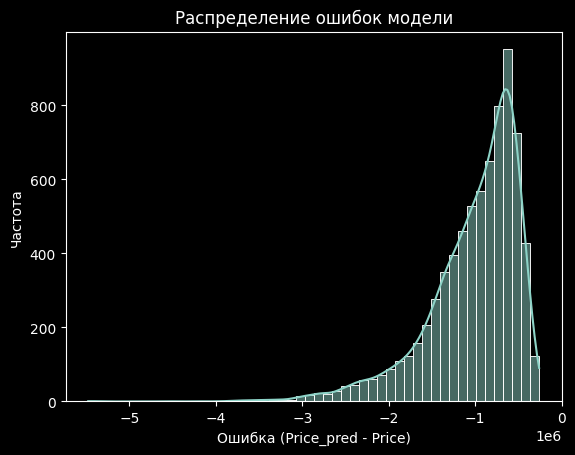

In [ ]:
# теперь посмотрим на распределение ошибок для абсолютного целевого признака (не логарифмированного)
sns.histplot(errors_original , bins=50, kde=True)
plt.xlabel("Ошибка (Price_pred - Price)")
plt.ylabel("Частота")
plt.title("Распределение ошибок модели")
plt.show()

In [ ]:
mean_absolute_error(test['Price'], test['Price_pred'])

159091.86170512103

In [ ]:
mean_absolute_percentage_error(test['Price'], test['Price_pred'])

0.143308205012706

In [ ]:
from sklearn.metrics import mean_squared_error


In [ ]:
variance = mean_squared_error (test['Target'], test['Target_pred'])

In [ ]:
variance

0.036617406659629814

In [ ]:
model.save_model("Melbourne_price_model.cbm")

# Чек-ап модели

In [ ]:
df2 = pd.read_csv('/content/test.csv/test.csv')

In [ ]:
df2.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,id
0,Abbotsford,513/6 Acacia Pl,3,u,S,Dingle,7/10/2017,3.0,3067.0,NaN,...,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0,30130
1,Abbotsford,60 Charles St,3,h,S,Jellis,7/10/2017,3.0,3067.0,3.0,...,NaN,192.0,109.0,1900.0,Yarra City Council,-37.80792,144.99508,Northern Metropolitan,4019.0,18311
2,Abbotsford,38 Studley St,3,h,S,Nelson,7/10/2017,3.0,3067.0,3.0,...,1.0,159.0,93.0,1890.0,Yarra City Council,-37.80124,144.99459,Northern Metropolitan,4019.0,18934
3,Airport West,18 Glenys Av,3,h,S,Raine,7/10/2017,10.4,3042.0,3.0,...,5.0,536.0,108.0,1980.0,Moonee Valley City Council,-37.72285,144.87539,Western Metropolitan,3464.0,1824
4,Airport West,35 Thomas St,3,h,S,Nelson,7/10/2017,10.4,3042.0,3.0,...,1.0,NaN,130.0,2009.0,Moonee Valley City Council,-37.71754,144.87704,Western Metropolitan,3464.0,31339


In [ ]:
df2['CouncilArea'].fillna('Maribyrnong City Council', inplace = True)
df2['Regionname'].fillna('Western Metropolitan', inplace = True)
df2['Propertycount'].fillna('7570.0', inplace = True)

/tmp/ipython-input-2974473503.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['CouncilArea'].fillna('Maribyrnong City Council', inplace = True)
/tmp/ipython-input-2974473503.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

In [ ]:
df2[num_cols]=df2[num_cols].fillna(df2[num_cols].median())

In [ ]:
df2[num_cols].isna().mean()

,0
Bedroom2,0.0
Bathroom,0.0
Car,0.0
Landsize,0.0
BuildingArea,0.0
YearBuilt,0.0
Lattitude,0.0
Longtitude,0.0


In [ ]:
df2.isna().mean()

,0
Suburb,0.000000
Address,0.000000
Rooms,0.000000
Type,0.000000
Method,0.000000
SellerG,0.000000
Date,0.000000
Distance,0.000113
Postcode,0.000113
Bedroom2,0.000000


In [ ]:
df2['Distance'] = df2['Distance'].fillna(df2['Distance'].median())

In [ ]:
df2['Postcode'] = df2['Distance'].fillna(df2['Distance'].median())

In [ ]:
df2.isna().mean()

,0
Suburb,0.0
Address,0.0
Rooms,0.0
Type,0.0
Method,0.0
SellerG,0.0
Date,0.0
Distance,0.0
Postcode,0.0
Bedroom2,0.0


In [ ]:
df2['Bed/Bath'] = df2['Bedroom2']/df2['Bathroom']

In [ ]:
df2['Landsize'] = np.log1p(df['Landsize'])

In [ ]:
df2.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,id,Bed/Bath
0,Abbotsford,513/6 Acacia Pl,3,u,S,Dingle,7/10/2017,3.0,3.0,3.0,...,1.842644,151.0,1975.0,Yarra City Council,-37.791325,145.01255,Northern Metropolitan,4019.0,30130,1.5
1,Abbotsford,60 Charles St,3,h,S,Jellis,7/10/2017,3.0,3.0,3.0,...,1.801090,109.0,1900.0,Yarra City Council,-37.807920,144.99508,Northern Metropolitan,4019.0,18311,3.0
2,Abbotsford,38 Studley St,3,h,S,Nelson,7/10/2017,3.0,3.0,3.0,...,1.775846,93.0,1890.0,Yarra City Council,-37.801240,144.99459,Northern Metropolitan,4019.0,18934,3.0
3,Airport West,18 Glenys Av,3,h,S,Raine,7/10/2017,10.4,10.4,3.0,...,1.714496,108.0,1980.0,Moonee Valley City Council,-37.722850,144.87539,Western Metropolitan,3464.0,1824,3.0
4,Airport West,35 Thomas St,3,h,S,Nelson,7/10/2017,10.4,10.4,3.0,...,1.757132,130.0,2009.0,Moonee Valley City Council,-37.717540,144.87704,Western Metropolitan,3464.0,31339,3.0


In [ ]:
y_pred = model.predict(df2[X])

In [ ]:
df2['Price'] = np.expm1(y_pred).round(0)

In [ ]:
submission = df2[['id', 'Price']]

In [ ]:
submission.to_csv("submission.csv", index=False)

In [ ]:
from google.colab import files
files.download("submission.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
submission

,id,Price
0,30130,1028291.0
1,18311,1464446.0
2,18934,1476148.0
3,1824,677464.0
4,31339,768469.0
...,...,...
8813,11120,1054393.0
8814,3950,700938.0
8815,2209,649930.0
8816,23872,1122004.0
